# 합성곱 신경망의 시각화

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 가중치 시각화

합성곱 층은 여러 개의 필터를 사용해 이미지에서 특징을 학습한다.   
예를 들어, 밝은 부분은 가중치가 높고, 어두운 부분은 가중치가 낮다.   
또는, 둥근 모서리가 있는 영역에서 높고, 그렇지 않은 영역에서 낮다.

2절에서 만든 모델이 어떤 가중치를 학습했는지 확인해보자.

In [ ]:
from tensorflow import keras

In [ ]:
# 코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.h5 파일을 다운로드받아 사용하세요.
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

--2023-03-14 05:42:52--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2023-03-14 05:42:53--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4049416 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5’

best-cnn-model.h5   100%[===================>]   3.86M  --.-KB/s    in 0.02s   

2023-03-14 05:42:55 (218 MB/s) - ‘best-cnn-model.h5’ saved [4049416/4049416]



In [ ]:
model = keras.models.load_model('best-cnn-model.h5')

In [ ]:
model.layers        # 파이썬 리스트에 저장되어 있다.
# 층마다 가중치들이 별도로 저장되어 있고, convolution 층에 가중치가 있다.

In [ ]:
# 층의 가중치와 절편은 층의 weights 속성에 저장되어 있다.
# 첫번째 층의 가중치(weights[0])와 절편(weights[1])의 크기(shape)를 출력해보자.
conv = model.layers[0]  # 첫번째 층을 변수에 저장.

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


▲ 커널의 크기가 (3, 3)이고, 입력 깊이가 1, 필터 개수 32개를 통과한 결과 -> 가중치의 크기 (2, 2, 1, 32)   
필터마다 1개의 절편 -> (32, )   

참고) weights 속성은 텐서플로의 다차원 배열인 Tensor 클래스의 객체.   
▼ 이를 numpy 배열로 변환하면 평균과 표준편차를 구할 수 있다.

In [ ]:
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.021033935 0.23466988


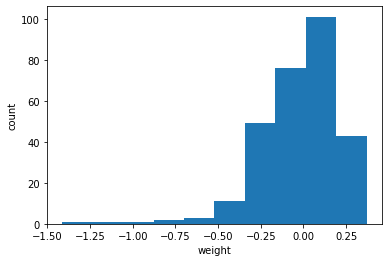

In [ ]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))   # 히스토그램을 그리기 위해 1개의 열이 있는 1차원 배열로 전달
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

훈련된 모델의 가중치를 시각화해보자.   
32개의 커널을 16개씩 두 줄에 출력.   
가중치 값이 어떤 패턴을 가지는 것을 볼 수 있다.   
* 아래 코드 중) imshow() 함수에서 최댓값과 최솟값은 기본적으로 배열 내에서 상대적으로 정해지므로,
* 최댓값과 최솟값에 절대적인 기준을 적용(vmin=-0.5, vmax=0.5)해서, 배열 간 픽셀의 강도를 비교하도록 한다.

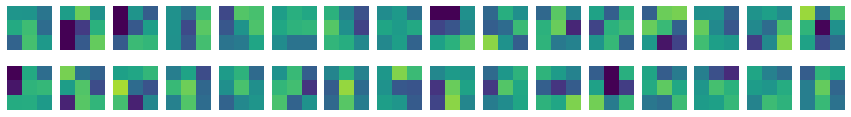

In [ ]:
# 훈련된 모델의 가중치 시각화
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

훈련하지 않은 빈 합성곱 신경망을 만들어서 위에서 훈련한 가중치와 어떻게 다른지 그림으로 비교해보자.

In [ ]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                                          padding='same', input_shape=(28,28,1)))

In [ ]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())
# ▼ 표준편차가 이전보다 매우 작은 것을 확인할 수 있다.

-0.010310263 0.0773888


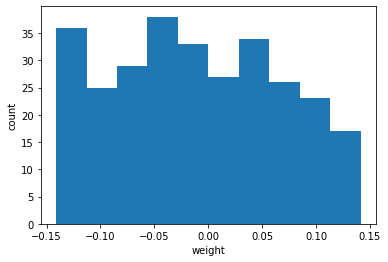

In [ ]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

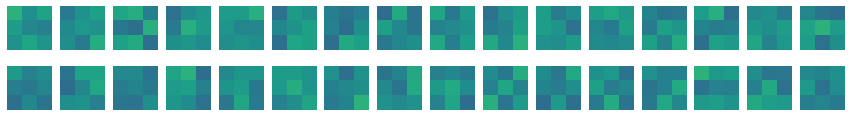

In [ ]:
# 훈련되지 않은 모델의 가중치 시각화
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

훈련된 모델 가중치   
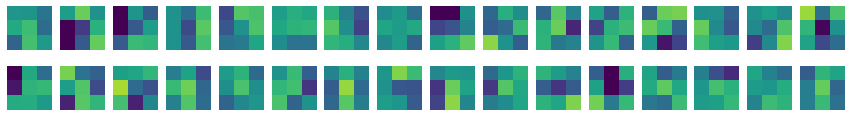

훈련되지 않은 모델 가중치   
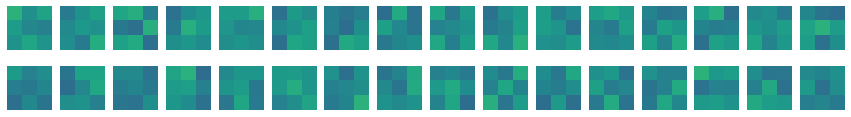

초반에 무작위로 적용되었던 가중치가, **학습을 거치면서 업데이트**된다.

## 함수형 API

********함수형 API 사용 예시********

지금까지 신경망 모델을 만들 때 케라스 Sequential 클래스를 사용함 = 층을 차례대로 쌓은 모델   
그 외의 복잡한 모델 중에는 **'함수형 API(functional API)'**가 있다.   
직접 수동으로 함수를 호출하여 다음 층에 넣어주는 과정이 필요하다.   
케라스의 keras.Input() 함수를 통해 InputLayer 클래스 객체를 만들 수 있다. -> 이를 inputs 변수에 저장

<img src="funcAPI.PNG" width="400">

In [ ]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [ ]:
# model.input과 model.layers[0].output을 연결하는 새로운 conv_acti 모델을 만들 수 있다.
conv_acti = keras.Model(model.input, model.layers[0].output)
# conv_acti의 predict() 메서드를 호출하면, 첫번째 Conv2D의 출력을 반환한다.

******** 사용 예시 끝 ********

## 특성 맵 시각화

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


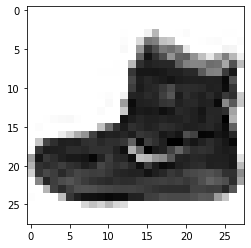

In [ ]:
# 훈련 세트의 첫번째 샘플 시각화
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [ ]:
# 위 샘플을 conv_acti 모델에 주입하여, Conv2D 층이 만드는 특성맵을 출력(시각화)해보자.
######## 첫번째 합성곱 층과 두번째 합성곱 층의 특성맵을 시각적으로 비교할 목적!! ########

# 1. 첫번째 합성곱 층
# 1) 샘플 reshape 후 conv_acti 모델에 주입 -> 특성맵(feature_maps) 변수에 저장
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 7s 7s/step


In [ ]:
# 1-1) 특성 맵 크기 확인; 샘플이 하나기 때문에 (1, 28, 28, 32) 첫번째 차원(배치차원) = 1
print(feature_maps.shape)

(1, 28, 28, 32)


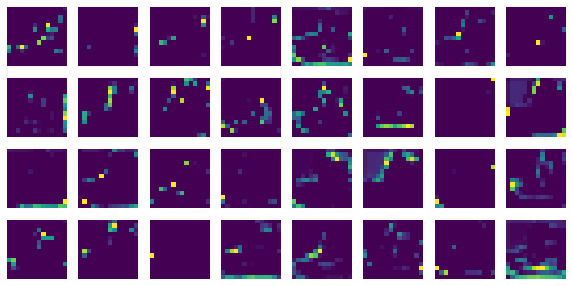

In [27]:
# 2) 특성맵 시각화
fig, axs = plt.subplots(4, 8, figsize=(10,5))   # 4개 행, 8개 열로 시각화

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [ ]:
# 2. 두번째 합성곱 층
# 두번째 합성곱 층 모델을 conv2_acti 변수에 저장
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [ ]:
# 1) 샘플 reshape 후 conv2_acti 모델에 주입 -> 특성맵(feature_maps) 변수에 저장
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)
print(feature_maps.shape)   # 64개 필터

1/1 [==============================] - 0s 126ms/step
(1, 14, 14, 64)


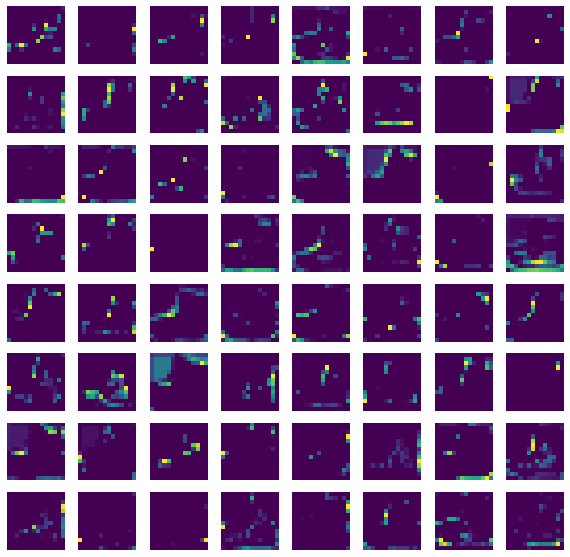

In [26]:
fig, axs = plt.subplots(8, 8, figsize=(10,10))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

참고) 필터의 특성 설명   
<img src="map.PNG" width="600px">

첫번째 합성곱 층(layers[0])을 거친 특성맵 시각화 (32개 필터를 가짐)   
<img src="first.png" width="500">

첫번째 풀링(layers[1]) -> 두번째 합성곱 층(layers[2])을 거친 특성맵 시각화   
(풀링 이후라 크기가 축소됨, 64개 필터를 가짐)   
<img src="second.png" width="500">